In [2]:
import pandas as pd
import numpy as np

X = pd.read_csv ('X_1994.csv')
X = X.drop(["Unnamed: 0"], axis = 1)
display(X)
y = pd.read_csv('y_1994.csv')
y = y.drop(["Unnamed: 0"], axis = 1)
y = y.replace("<=50K", 0)
y = y.replace(">50K", 1)
y = y.values.ravel()
display(y)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_cat,workclass_cat,marital-status_cat,occupation_cat,relationship_cat,race_cat,gender_cat,native-country_cat
0,25,226802.0,7,0,0,40,1,2,4,6,3,2,1,38
1,38,89814.0,9,0,0,50,11,2,2,4,0,4,1,38
2,28,336951.0,12,0,0,40,7,1,2,10,0,4,1,38
3,44,160323.0,10,7688,0,40,15,2,2,6,0,2,1,38
4,34,198693.0,6,0,0,30,0,2,4,7,1,4,1,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,257302.0,12,0,0,38,7,2,2,12,5,4,0,38
45218,40,154374.0,9,0,0,40,11,2,2,6,0,4,1,38
45219,58,151910.0,9,0,0,40,11,2,6,0,4,4,0,38
45220,22,201490.0,9,0,0,20,11,2,4,0,3,4,1,38


array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 
# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# rf = RandomForestClassifier()
# grid_search = GridSearchCV(estimator = rf, param_grid = hyperF, cv = 5)
# grid_search.fit(X_train, y_train)
# bestest = grid_search.best_estimator_
# preds = bestest.predict_proba(X_test)
# print(grid_search.best_params_)
# bestest.fit(X_train, y_train)
# print("AUC: " + str(roc_auc_score(y_test, preds[:,1])))
# feat_importances = pd.Series(bestest.feature_importances_, index=X.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.title("Random Forest Feature Importance")

# (bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=None, max_features='auto',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=100,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)

Test with n_estimators=100
ROC:0.9052625770213404
Test with n_estimators=300
ROC:0.9066530118162007
Test with n_estimators=500
ROC:0.9070589442205816
Test with n_estimators=800
ROC:0.9075982843966035
Test with n_estimators=1200
ROC:0.9077216095346785
Best params: 1200, score: 0.9077216095346785


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


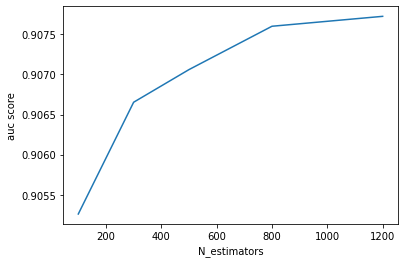

In [ ]:
from sklearn.model_selection import cross_val_score

params = {
    'n_estimators' : 1000
}
gridsearch_params = [
    (n_estimators)
    for n_estimators in [100, 300, 500, 800, 1200]
]

max_score = 0.0
n_estimatorss =  [100, 300, 500, 800, 1200]
scores = []
best_params = None
for n_estimators in gridsearch_params:
    print("Test with n_estimators={}".format(
                             n_estimators,))
    # Update our parameters
    params['n_estimators'] = n_estimators
    # Run 
    boost = RandomForestClassifier()
    boost.set_params(**params)
    boost.fit(X_train, y_train)
    preds = boost.predict_proba(X_test)
    # score = np.mean(cross_val_score(boost, X, y, cv = 5, scoring = 'roc_auc'))
    # scores.append(score)
    # print("ROC: " + str(score))
    # if score > max_score:
    #   max_score = score
    #   best_params = n_estimators
    pscore = roc_auc_score(y_test, preds[:,1])
    scores.append(pscore)
    print ("ROC:" + str(pscore))
    # Update best precision
    if pscore > max_score:
        max_score = pscore
        best_params = n_estimators
print("Best params: {}, score: {}".format(best_params, max_score))
plt.plot(n_estimatorss, scores)
plt.xlabel("N_estimators")
plt.ylabel("auc score")
plt.subplot()
# with cross validation
# Test with n_estimators=100
# ROC: 0.9054748347293543
# Test with n_estimators=300
# ROC: 0.9071026175555186
# Test with n_estimators=500
# ROC: 0.9073725715226381
# Test with n_estimators=800
# ROC: 0.9073165931707239
# Test with n_estimators=1200

None
Test with max_depth=5
ROC:0.9011093098371281
Test with max_depth=8
ROC:0.9121508062584536
Test with max_depth=15
ROC:0.9179126570953562
Test with max_depth=25
ROC:0.9127552212484973
Test with max_depth=30
ROC:0.9105873816501353
Best params: 15, score: 0.9179126570953562


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


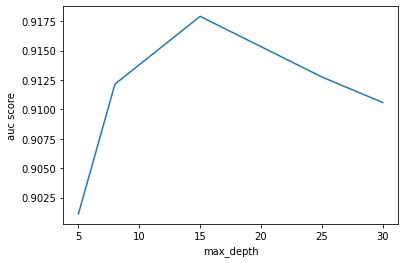

In [ ]:
params['n_estimators'] = 1200
gridsearch_params = [
    (max_depth)
    for max_depth in [5, 8, 15, 25, 30]
]

max_score = 0.0
max_depths = [5, 8, 15, 25, 30]
scores = []
best_params = None
for max_depth in gridsearch_params:
    print("Test with max_depth={}".format(
                             max_depth,))
    # Update our parameters
    params['max_depth'] = max_depth
    # Run 
    boost = RandomForestClassifier()
    boost.set_params(**params)
    boost.fit(X_train, y_train)
    preds = boost.predict_proba(X_test)
    pscore = roc_auc_score(y_test, preds[:,1])
    scores.append(pscore)
    print ("ROC:" + str(pscore))
    # Update best precision
    if pscore > max_score:
        max_score = pscore
        best_params = max_depth
print("Best params: {}, score: {}".format(best_params, max_score))
plt.plot(max_depths, scores)
plt.xlabel("max_depth")
plt.ylabel("auc score")
plt.subplot()

Test with min_samples_split=2
ROC:0.9179908085127366
Test with min_samples_split=5
ROC:0.9179946537092349
Test with min_samples_split=10
ROC:0.9178263749953035
Test with min_samples_split=15
ROC:0.9177109310424181
Test with min_samples_split=100
ROC:0.9159934637530058
Best params: 5, score: 0.9179946537092349


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


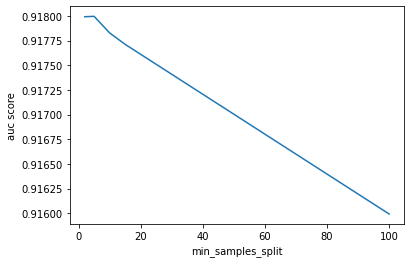

In [ ]:

params = {
    'n_estimators' : 1200,
    'max_depth' : 15
}
gridsearch_params = [
    (min_samples_split)
    for min_samples_split in [2, 5, 10, 15, 100]
]

max_score = 0.0
min_samples_splits = [2, 5, 10, 15, 100]
scores = []
best_params = None
for min_samples_split in gridsearch_params:
    print("Test with min_samples_split={}".format(
                             min_samples_split,))
    # Update our parameters
    params['min_samples_split'] = min_samples_split
    # Run 
    boost = RandomForestClassifier()
    boost.set_params(**params)
    boost.fit(X_train, y_train)
    preds = boost.predict_proba(X_test)
    pscore = roc_auc_score(y_test, preds[:,1])
    scores.append(pscore)
    print ("ROC:" + str(pscore))
    # Update best precision
    if pscore > max_score:
        max_score = pscore
        best_params = min_samples_split
print("Best params: {}, score: {}".format(best_params, max_score))
plt.plot(min_samples_splits, scores)
plt.xlabel("min_samples_split")
plt.ylabel("auc score")
plt.subplot()

Test with min_samples_leaf=1
ROC:0.9181288099733244
Test with min_samples_leaf=2
ROC:0.9178470979626917
Test with min_samples_leaf=5
ROC:0.9170735090030432
Test with min_samples_leaf=10
ROC:0.9160418809409754
Best params: 1, score: 0.9181288099733244


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


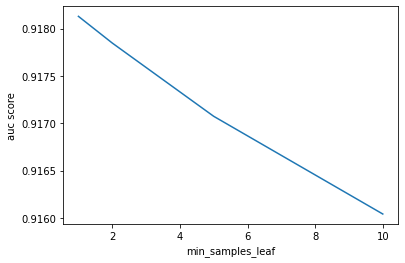

In [ ]:
params = {
    'n_estimators' : 1200,
    'max_depth' : 15,
    'min_samples_split' : 5
}
gridsearch_params = [
    (min_samples_leaf)
    for min_samples_leaf in [1, 2, 5, 10] 
]

max_score = 0.0
min_samples_leafs = [1, 2, 5, 10] 
scores = []
best_params = None
for min_samples_leaf in gridsearch_params:
    print("Test with min_samples_leaf={}".format(
                             min_samples_leaf,))
    # Update our parameters
    params['min_samples_leaf'] = min_samples_leaf
    # Run 
    boost = RandomForestClassifier()
    boost.set_params(**params)
    boost.fit(X_train, y_train)
    preds = boost.predict_proba(X_test)
    pscore = roc_auc_score(y_test, preds[:,1])
    scores.append(pscore)
    print ("ROC:" + str(pscore))
    # Update best precision
    if pscore > max_score:
        max_score = pscore
        best_params = min_samples_leaf
print("Best params: {}, score: {}".format(best_params, max_score))
plt.plot(min_samples_leafs, scores)
plt.xlabel("min_samples_leaf")
plt.ylabel("auc score")
plt.subplot()

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
params = {
    'n_estimators' : 1200,
    'max_depth' : 15,
    'min_samples_split' : 5,
    'min_samples_leaf' : 1
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

seeds =  list(range(1, 21))
rocSum = 0
for i in seeds: 
  rf = RandomForestClassifier(random_state = i)
  rf.set_params(**params)
  rf.fit(X_train, y_train)
  preds = rf.predict_proba(X_test)
  rocScore = roc_auc_score(y_test, preds[:,1])
  print(rocScore)
  rocSum += rocScore
print("Avg: " + str(rocSum/20))


0.9170387511572906
0.9170240435005191
0.9168636291068104
0.9169930709056711
0.9170269129355169
0.9168968078501742
0.9170146132970599
0.9170699832990232
0.9168320364832941
0.916798468419604
0.916820602001118
0.9168552370908878
0.916889641472316
0.9169469003988255
0.9171904851496502
0.9171487125205647
0.9169012778242911
0.9169461938545298
0.9169364175885579
0.9170071441145032
Avg: 0.9169600464485104
